In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
import healpy as hp
from scipy import interpolate

In [2]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)

from utils import load_spectral_types, main_sequence_cut_r, main_locus

In [4]:
root_data_dir = abspath(join(pardir, "Data"))
data_dir = join(root_data_dir, "Completeness")
comp_path = join(root_data_dir, "comp.hdf5")

In [5]:
# import mamajek spectral boundaries
df_s = load_spectral_types()
df_s

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
comp = vaex.open(comp_path)
comp

#,comp,index,jk,j,jk_low,jk_high,j_low,j_high
0,0.0,0,-0.4666666666666667,4.095000000000001,-0.5,-0.43333333333333335,4.0,4.19
1,0.0,0,-0.4666666666666667,4.285,-0.5,-0.43333333333333335,4.19,4.38
2,0.0,0,-0.4666666666666667,4.475,-0.5,-0.43333333333333335,4.38,4.57
3,0.0,0,-0.4666666666666667,4.665,-0.5,-0.43333333333333335,4.57,4.76
4,0.0,0,-0.4666666666666667,4.855,-0.5,-0.43333333333333335,4.76,4.95
...,...,...,...,...,...,...,...,...
"71,995",0.0,47,1.4666666666666668,12.645,1.4333333333333333,1.5,12.55,12.74
"71,996",0.0,47,1.4666666666666668,12.835,1.4333333333333333,1.5,12.74,12.93
"71,997",0.0,47,1.4666666666666668,13.025,1.4333333333333333,1.5,12.93,13.120000000000001
"71,998",0.0,47,1.4666666666666668,13.215,1.4333333333333333,1.5,13.120000000000001,13.31


In [8]:
# distance modulus
DMs = np.linspace(-2, 12, 100)

In [42]:
def comp_compute(NPIX, DMs, comp, JK, MJ):
  comp_dm = np.empty((NPIX, len(DMs)))
  for index in range(NPIX):
    print("\nINDEX = ", index)
    comp_df_i = comp[comp["index"] == index]
    jk = np.unique(comp_df_i.jk.to_numpy())
    j = np.unique(comp_df_i.j.to_numpy())
    comp_i = np.empty((len(jk), len(j)))
    for i, jj in enumerate(j):
      comp_i[:, i] = comp_df_i[comp_df_i.j == jj].comp.to_numpy()
    comp_interp = interpolate.interp2d(jk, j, comp_i.T, kind='cubic')
    
    for i, dm in enumerate(DMs):
      comp_val = np.empty_like(MJ)
      for ii, (jk_, mj_) in enumerate(zip(JK, MJ)):
        comp_val[ii] = comp_interp(jk_, mj_+dm)
      comp_avg = np.mean(comp_val)
      comp_dm[index, i] = comp_avg
      print(i, end=" ")
  return comp_dm
  

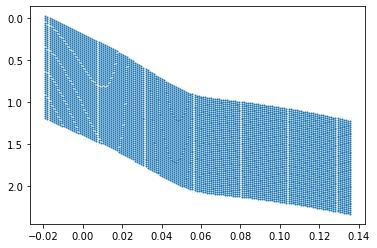

In [49]:
# A star boundaries
JK_lower = (df_s[df_s['SpT'] == 'B9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'A0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'A9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'F0V']['J-K'].to_numpy()[0])/2

JK_unique = np.linspace(JK_lower, JK_upper, 150)
MJ = np.array([])
JK = np.array([])
for jk in JK_unique:
  MJ_lower = main_sequence_cut_r(jk, low=True)
  MJ_upper = main_sequence_cut_r(jk)
  MJ_dummy = np.linspace(MJ_lower, MJ_upper, 50)
  JK_dummy = np.ones_like(MJ_dummy)*jk
  MJ = np.concatenate((MJ, MJ_dummy), axis=0)
  JK = np.concatenate((JK, JK_dummy), axis=0)
plt.scatter(JK, MJ, s=1)
plt.gca().invert_yaxis()

In [43]:
comp_dm = comp_compute(NPIX, DMs, comp, JK, MJ)


INDEX =  0
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  3
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30

<BarContainer object of 100 artists>

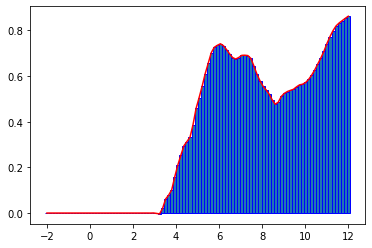

In [44]:
i = 7
plt.plot(DMs, comp_dm[i], c='r')
plt.bar(DMs, comp_dm[i], width=(DMs[1]-DMs[0]), edgecolor='blue')

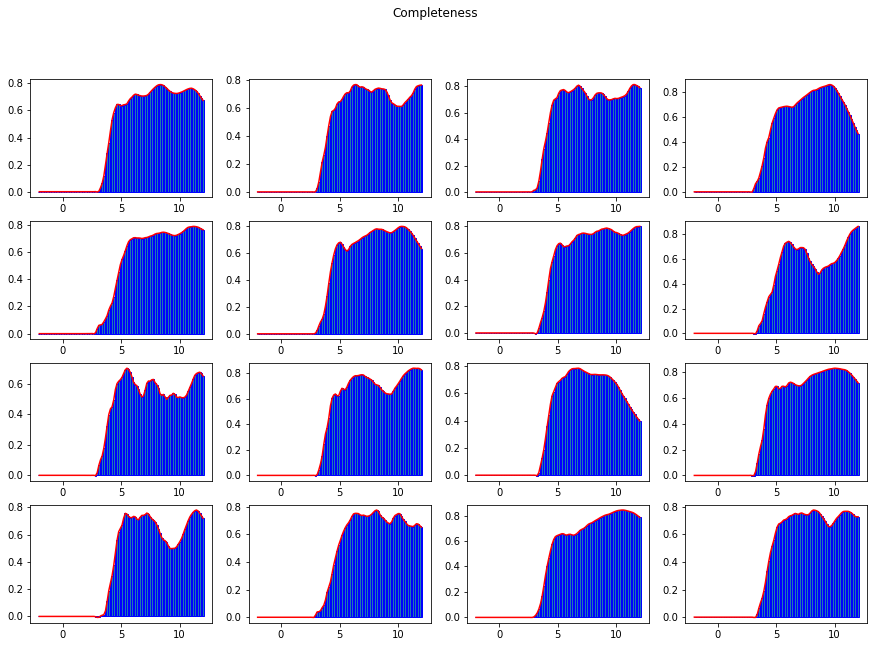

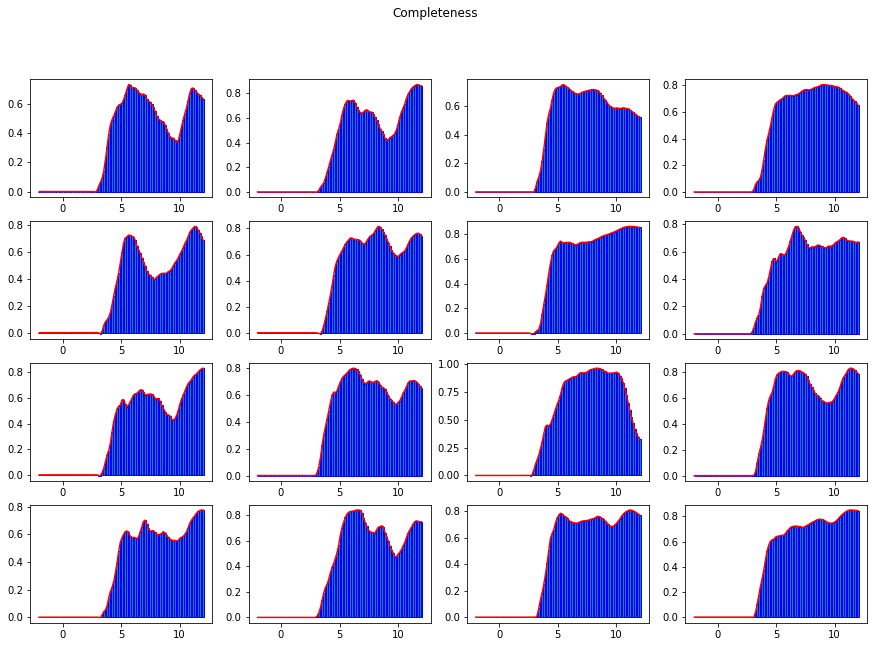

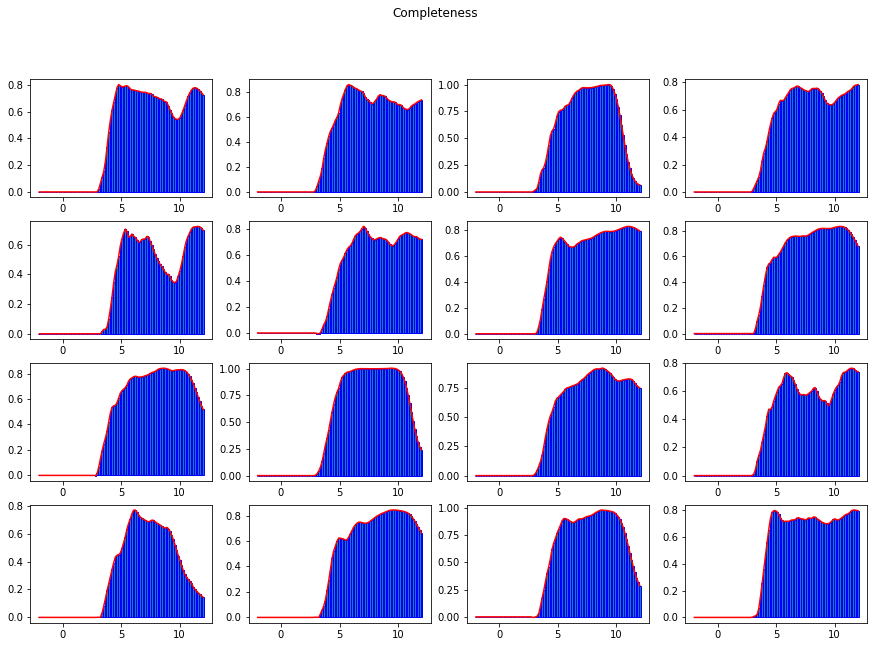

In [45]:
for k in range(3):
  fig, axs = plt.subplots(4, 4, figsize=(15,10))
  fig.suptitle('Completeness A-type')
  for i, ax in enumerate(axs):
    for j in range(4):
      ax[j].bar(DMs, comp_dm[(i+k*4)*4+j], width=(DMs[1]-DMs[0]), edgecolor='blue')
      ax[j].plot(DMs, comp_dm[(i+k*4)*4+j], c="r")

In [47]:
comp_dm_df = []
for index in range(NPIX):
  comp_index = comp_dm[index]
  dummy = vaex.from_arrays(index=np.ones_like(DMs, dtype=int)*index, comp=comp_index, dm=DMs)
  if len(comp_dm_df) == 0:
    comp_dm_df = dummy
  else:
    comp_dm_df = comp_dm_df.concat(dummy)
comp_dm_df

#,index,comp,dm
0,0,2.2809704437388014e-20,-2.0
1,0,2.2809704437388014e-20,-1.8585858585858586
2,0,2.2809704437388014e-20,-1.7171717171717171
3,0,2.2809704437388014e-20,-1.5757575757575757
4,0,2.2809704437388014e-20,-1.4343434343434343
...,...,...,...
"4,795",47,0.7951043773921733,11.434343434343434
"4,796",47,0.800424204618738,11.575757575757574
"4,797",47,0.8006826537812374,11.717171717171716
"4,798",47,0.7982761329001654,11.858585858585858


In [48]:
comp_dm_df.export(join(data_dir, "comp-A.hdf5"))

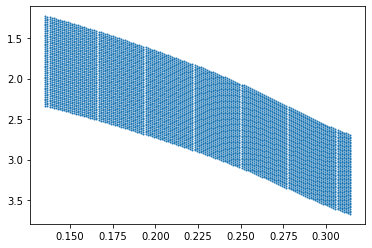

In [50]:
# F star boundaries
JK_lower = (df_s[df_s['SpT'] == 'A9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'F0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'F9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G0V']['J-K'].to_numpy()[0])/2

JK_unique = np.linspace(JK_lower, JK_upper, 150)
MJ = np.array([])
JK = np.array([])
for jk in JK_unique:
  MJ_lower = main_sequence_cut_r(jk, low=True)
  MJ_upper = main_sequence_cut_r(jk)
  MJ_dummy = np.linspace(MJ_lower, MJ_upper, 50)
  JK_dummy = np.ones_like(MJ_dummy)*jk
  MJ = np.concatenate((MJ, MJ_dummy), axis=0)
  JK = np.concatenate((JK, JK_dummy), axis=0)
plt.scatter(JK, MJ, s=1)
plt.gca().invert_yaxis()

In [51]:
comp_dm = comp_compute(NPIX, DMs, comp, JK, MJ)


INDEX =  0
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  3
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30

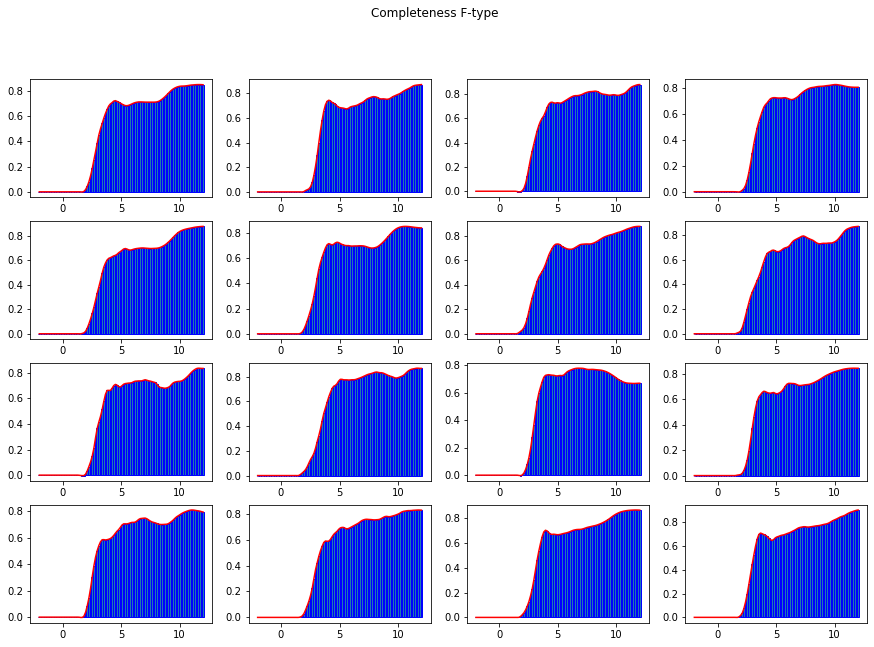

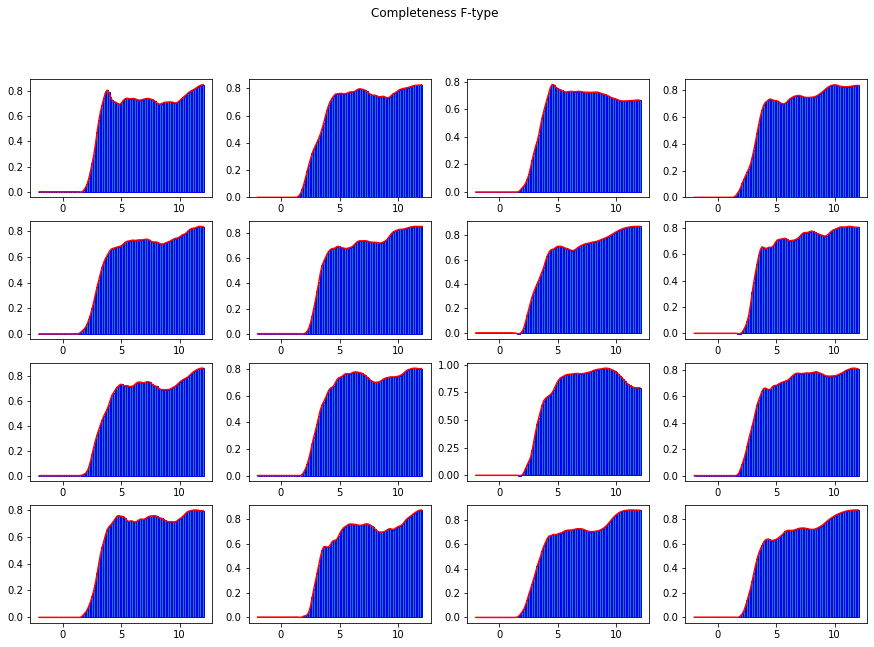

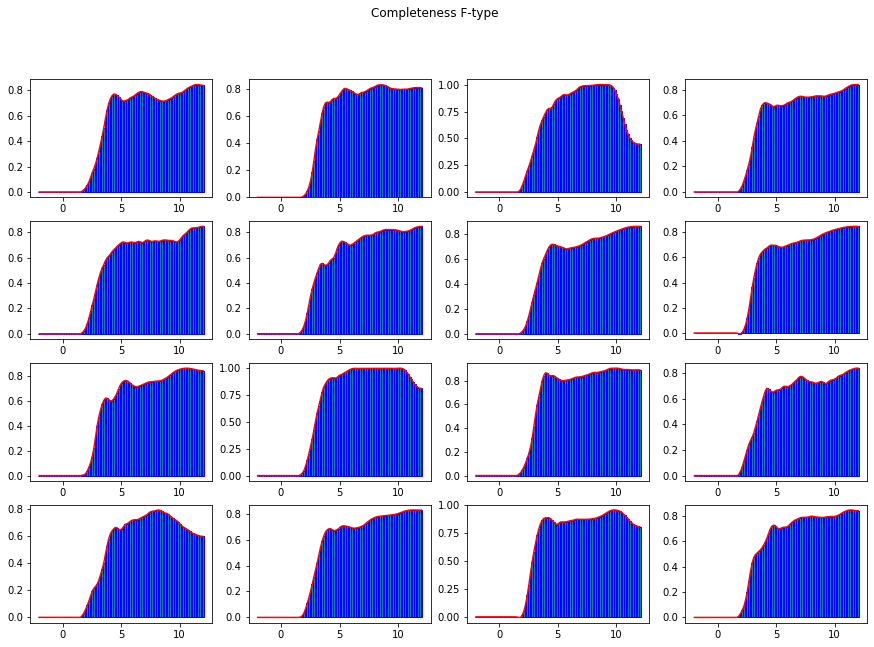

In [52]:
for k in range(3):
  fig, axs = plt.subplots(4, 4, figsize=(15,10))
  fig.suptitle('Completeness F-type')
  for i, ax in enumerate(axs):
    for j in range(4):
      ax[j].bar(DMs, comp_dm[(i+k*4)*4+j], width=(DMs[1]-DMs[0]), edgecolor='blue')
      ax[j].plot(DMs, comp_dm[(i+k*4)*4+j], c="r")

In [53]:
comp_dm_df = []
for index in range(NPIX):
  comp_index = comp_dm[index]
  dummy = vaex.from_arrays(index=np.ones_like(DMs, dtype=int)*index, comp=comp_index, dm=DMs)
  if len(comp_dm_df) == 0:
    comp_dm_df = dummy
  else:
    comp_dm_df = comp_dm_df.concat(dummy)
comp_dm_df

#,index,comp,dm
0,0,3.587993323032883e-20,-2.0
1,0,3.587993323032883e-20,-1.8585858585858586
2,0,3.587993323032883e-20,-1.7171717171717171
3,0,3.587993323032883e-20,-1.5757575757575757
4,0,3.587993323032883e-20,-1.4343434343434343
...,...,...,...
"4,795",47,0.848622933714598,11.434343434343434
"4,796",47,0.8474402182393225,11.575757575757574
"4,797",47,0.845184389938608,11.717171717171716
"4,798",47,0.8430945042786727,11.858585858585858


In [54]:
comp_dm_df.export(join(data_dir, "comp-F.hdf5"))

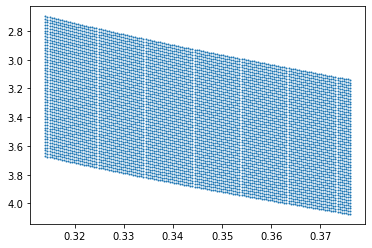

In [55]:
# G star boundaries
JK_lower = (df_s[df_s['SpT'] == 'F9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'G3V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G4V']['J-K'].to_numpy()[0])/2

JK_unique = np.linspace(JK_lower, JK_upper, 150)
MJ = np.array([])
JK = np.array([])
for jk in JK_unique:
  MJ_lower = main_sequence_cut_r(jk, low=True)
  MJ_upper = main_sequence_cut_r(jk)
  MJ_dummy = np.linspace(MJ_lower, MJ_upper, 50)
  JK_dummy = np.ones_like(MJ_dummy)*jk
  MJ = np.concatenate((MJ, MJ_dummy), axis=0)
  JK = np.concatenate((JK, JK_dummy), axis=0)
plt.scatter(JK, MJ, s=1)
plt.gca().invert_yaxis()

In [56]:
comp_dm = comp_compute(NPIX, DMs, comp, JK, MJ)


INDEX =  0
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
INDEX =  3
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30

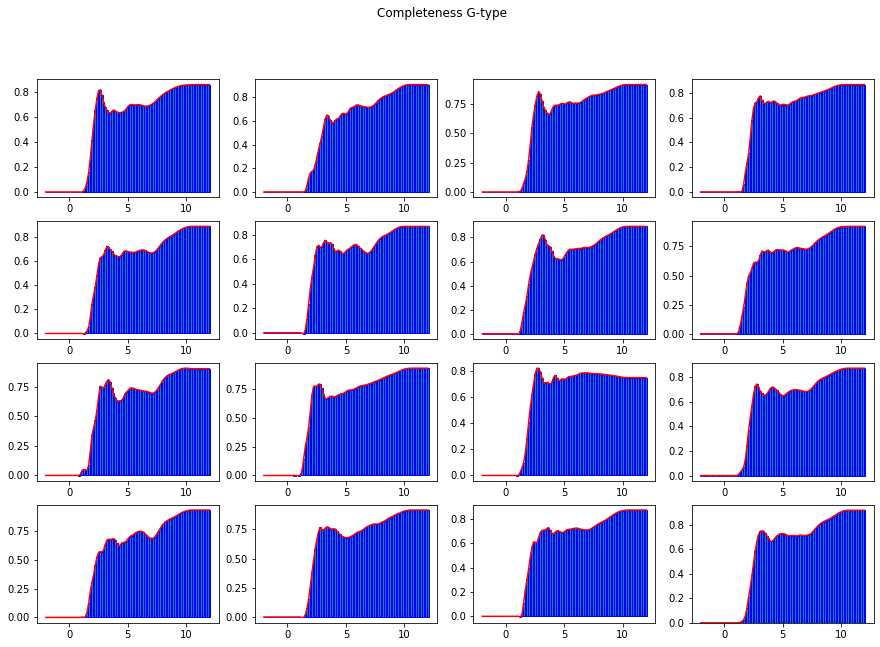

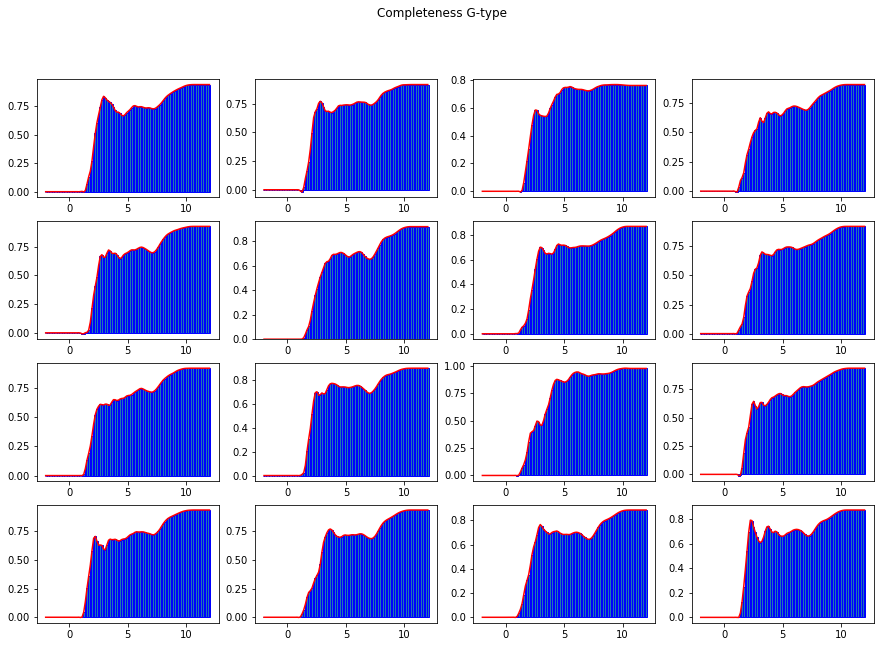

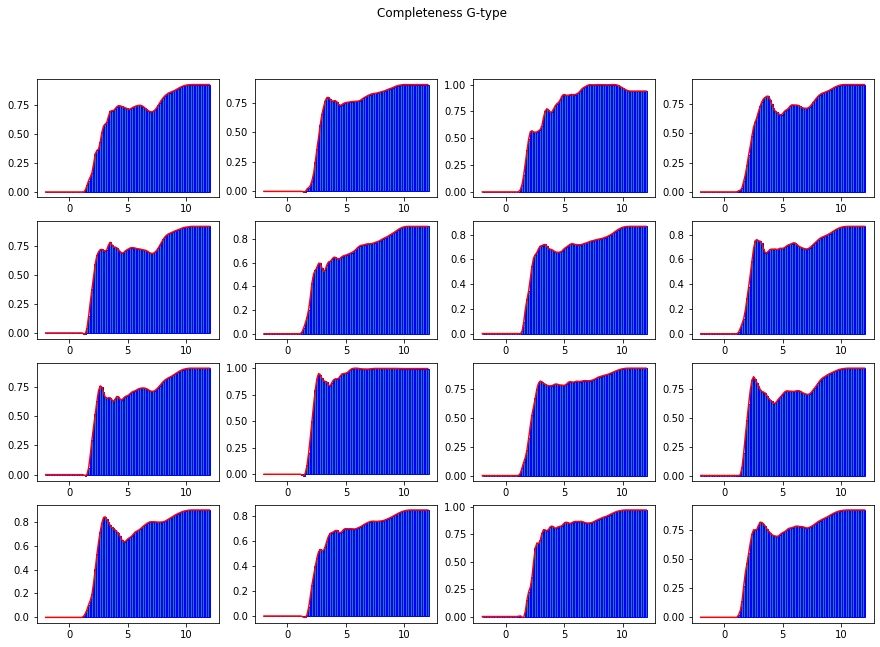

In [57]:
for k in range(3):
  fig, axs = plt.subplots(4, 4, figsize=(15,10))
  fig.suptitle('Completeness G-type')
  for i, ax in enumerate(axs):
    for j in range(4):
      ax[j].bar(DMs, comp_dm[(i+k*4)*4+j], width=(DMs[1]-DMs[0]), edgecolor='blue')
      ax[j].plot(DMs, comp_dm[(i+k*4)*4+j], c="r")

In [58]:
comp_dm_df = []
for index in range(NPIX):
  comp_index = comp_dm[index]
  dummy = vaex.from_arrays(index=np.ones_like(DMs, dtype=int)*index, comp=comp_index, dm=DMs)
  if len(comp_dm_df) == 0:
    comp_dm_df = dummy
  else:
    comp_dm_df = comp_dm_df.concat(dummy)
comp_dm_df

#,index,comp,dm
0,0,-5.353125429564271e-22,-2.0
1,0,-5.353125429564271e-22,-1.8585858585858586
2,0,-5.353125429564271e-22,-1.7171717171717171
3,0,-5.353125429564271e-22,-1.5757575757575757
4,0,-5.353125429564271e-22,-1.4343434343434343
...,...,...,...
"4,795",47,0.9166514371672921,11.434343434343434
"4,796",47,0.9166514371672921,11.575757575757574
"4,797",47,0.9166514371672921,11.717171717171716
"4,798",47,0.9166514371672921,11.858585858585858


In [ ]:
comp_dm_df.export(join(data_dir, "comp-G.hdf5"))